Results evaluation for the (1 + 1) - ES

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import warnings
warnings.filterwarnings("ignore")
sns.set_style("darkgrid")
sns.set(font = "arial")

_mu = "\u03BC"
_lam = "\u03BB"
_sig = "\u03C3"

Compare convergence of the functions

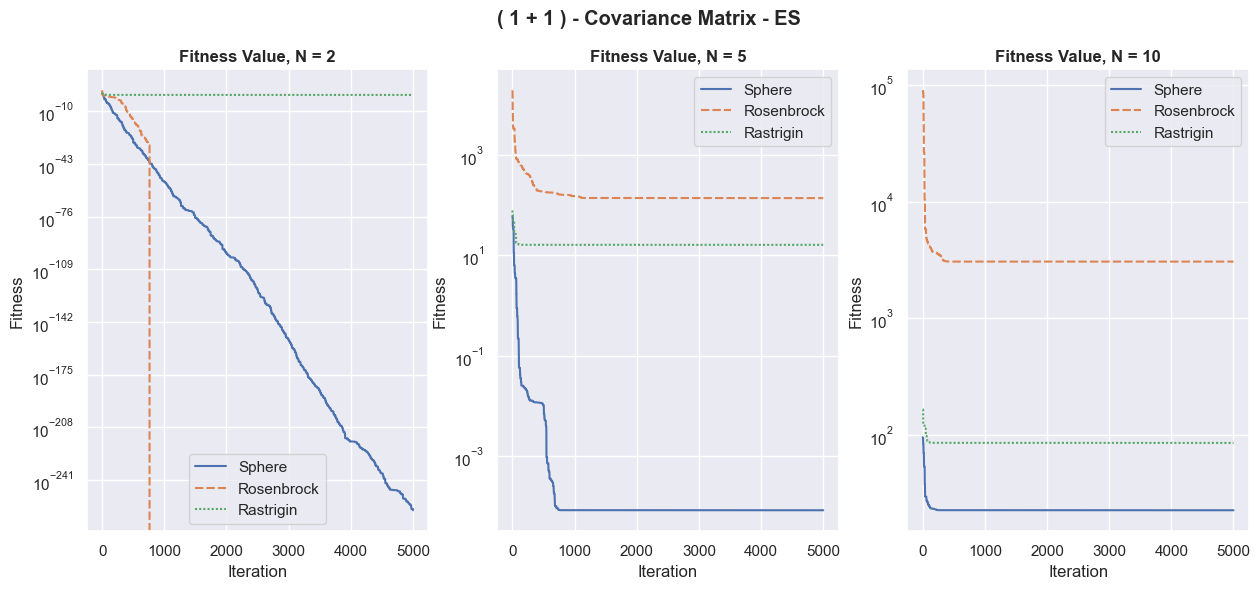

In [2]:

df_r = pd.DataFrame()
FUNC_NAMES = ["Sphere", "Rosenbrock", "Rastrigin"]
fig, axs = plt.subplots(1, 3, figsize=(15, 6))
fig.suptitle(f"( 1 + 1 ) - Covariance Matrix - ES",fontweight="bold")
i = 0
for n in [2, 5, 10]:
    ax = axs[i]
    i += 1
    df_r = pd.DataFrame()
    for f in [0, 1, 2]:
        path = os.path.join(os.getcwd(), "one_one_covar")
        filename = f"F_{f}_n_{n}.csv"
        path = os.path.join(path, filename)
        df = pd.read_csv(path)
        df_r[FUNC_NAMES[f]] = df["fitness"]

    ax = sns.lineplot(data=df_r, ax=ax)
    ax.set_yscale("log")
    #ax.set_ylim(bottom = 1e-20)
    ax.set_xlabel("Iteration")
    ax.set_ylabel("Fitness")
    ax.set_title(f"Fitness Value, N = {n}", fontweight="bold")


Analysis of Sigma 

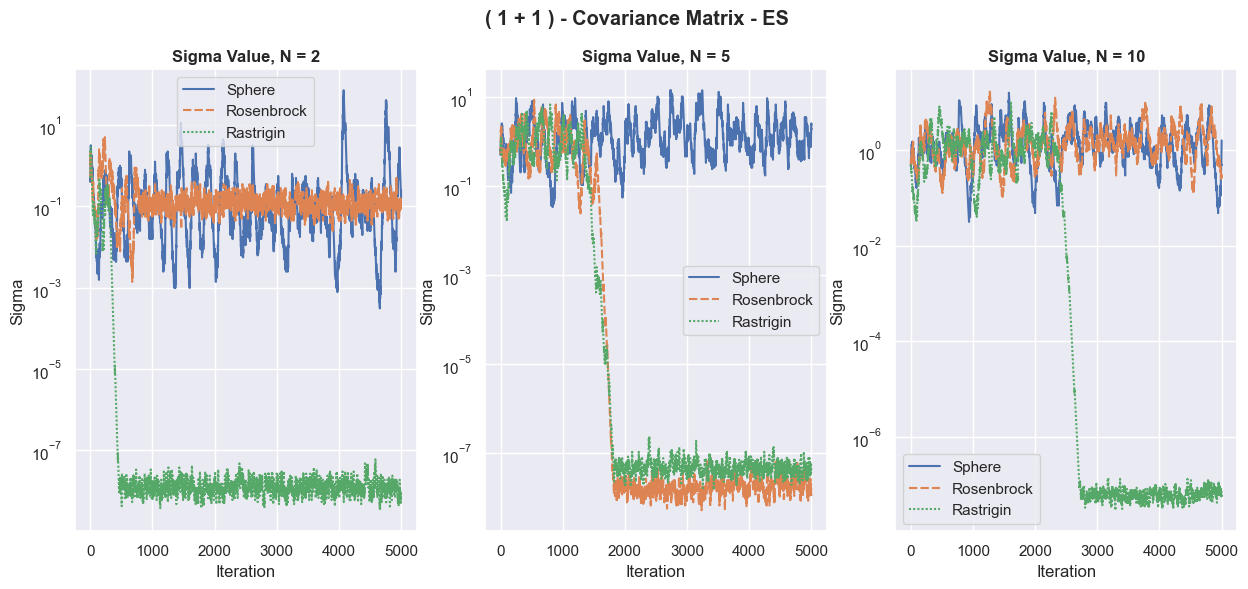

In [3]:
df_r = pd.DataFrame()
FUNC_NAMES = ["Sphere", "Rosenbrock", "Rastrigin"]
fig, axs = plt.subplots(1, 3, figsize=(15, 6))
fig.suptitle(f"( 1 + 1 ) - Covariance Matrix - ES", fontweight="bold")
i = 0
for n in [2, 5, 10]:
    ax = axs[i]
    i += 1
    df_r = pd.DataFrame()
    for f in [0, 1, 2]:
        path = os.path.join(os.getcwd(), "one_one_covar")
        filename = f"F_{f}_n_{n}.csv"
        path = os.path.join(path, filename)
        df = pd.read_csv(path)
        df_r[FUNC_NAMES[f]] = df["sigma"]

    ax = sns.lineplot(data=df_r, ax=ax)
    ax.set_yscale("log")
    #ax.set_ylim(bottom = 1e-35)
    ax.set_xlabel("Iteration")
    ax.set_ylabel("Sigma")
    ax.set_title(f"Sigma Value, N = {n}", fontweight="bold")

Evolution Route

In [4]:
def calc_fitness(genes, func=None):
    """Calculates the fitness of the genes

    Args:
        genes (array): Array with the genes
        func (int): Integer to look the function

    Raises:
        ValueError: If the fitness function is not found

    Returns:
        double: fitness value of the function
    """

    func_list =  ["sphere","rosenbrock", "rastrigin"]
    func = func_list[func]
    if func not in ["sphere", "rosenbrock", "rastrigin"]:
        raise ValueError("Fitness function not recognized")
    # Fitnessfunktion ist die Multiplikation aller N Elemente
    if func == "sphere":
        fitness = np.dot(genes, genes)
        return fitness

    if func == "rosenbrock":
        fitness = 0
        for i in range(len(genes) - 1):
            x = genes[i]
            y = genes[i + 1]
            fitness += 100 * (x * x - y) ** 2 + (x - 1) ** 2
        return fitness

    if func == "rastrigin":
        a = 10
        n = len(genes)
        fitness = a * n
        for i in range(n):
            x = genes[i]
            fitness += x * x - a * np.cos(2 * np.pi * x) # wikipedia says minus!!
        return fitness

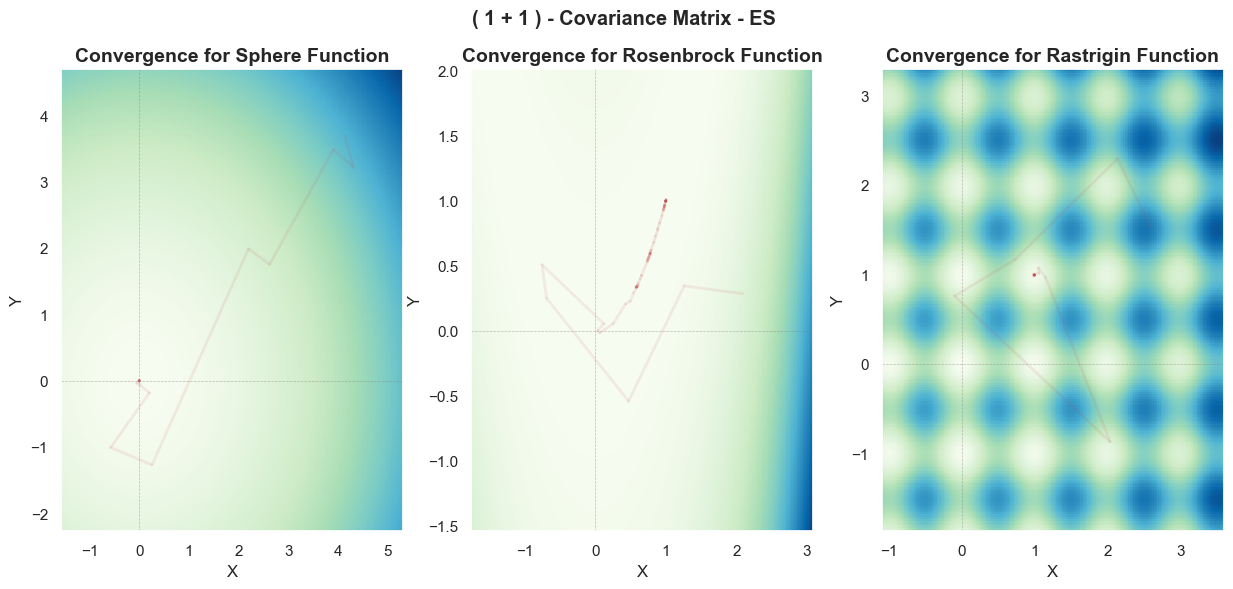

In [5]:
df_r = pd.DataFrame()
FUNC_NAMES = ["Sphere", "Rosenbrock", "Rastrigin"]
fig, axs = plt.subplots(1, 3, figsize=(15, 6))
fig.suptitle(f"( 1 + 1 ) - Covariance Matrix - ES", fontweight="bold")
i = 0
import ast
# Only for n == 2
ran = 10
import numpy as np


for f in [0, 1, 2]:
    ax = axs[f]
    n=2
    path = os.path.join(os.getcwd(), "one_one_covar")
    filename = f"F_{f}_n_{n}.csv"
    path = os.path.join(path, filename)
    df = pd.read_csv(path)

    genes_ = [gen.replace("[","").replace("]","").split(" ") for gen in df["genes"]]
    new_genes_ = []
    for x in genes_:
        gen = [float(y) for y in x if y != ""] 
        new_genes_.append(gen)
    genes_ = new_genes_
    df_r[FUNC_NAMES[f]] = new_genes_
    ax.set_xlabel("X")
    ax.set_ylabel("Y")

#ax.set_ylim(bottom = min(res["rosenbrock"]))
    ax.set_title(f"Convergence for {FUNC_NAMES[f]} Function", fontsize= 14, fontweight = "bold")
    


    # Print Start and finish
    ax.scatter([genes_[0][0],genes_[-1][0]],[genes_[0][1],genes_[-1][1]],color = "orange")
    alphas = np.linspace(0.1,1,num=len(genes_)+1)
    for i in range(len(genes_)-1):
        ax.plot([genes_[i][0],genes_[i+1][0]],[genes_[i][1],genes_[i+1][1]], 'r', lw=2, alpha=alphas[i])

    # find the limits to view better:
    g_x = [g[0] for g in genes_]
    g_y = [g[1] for g in genes_]
    x_min = min(min(g_x),0)
    y_min = min(min(g_y),0)
    x_max = max(max(g_x),0)
    y_max = max(max(g_y),0)

    ax.set_xlim(left= x_min-1, right = x_max+1)
    ax.set_ylim(bottom= y_min-1, top = y_max+1)

    x = np.linspace(x_min-1,x_max+1,num=201)
    y = np.linspace(y_min-1,y_max+1,num=201)
    X, Y = np.meshgrid(x,y)
    Z = np.zeros((201,201))
    for i in range(201):
        for j in range(201):
            Z[i,j] = calc_fitness((X[i,j],Y[i,j]), f)


    ax.pcolor(X, Y, Z,cmap="GnBu")
    ax.axhline(y=0, color='grey', alpha = 0.5, lw  = 0.5, ls = "--")
    ax.axvline(x=0, color='grey', alpha = 0.5, lw  = 0.5, ls = "--")

PLot Covariance Elipses

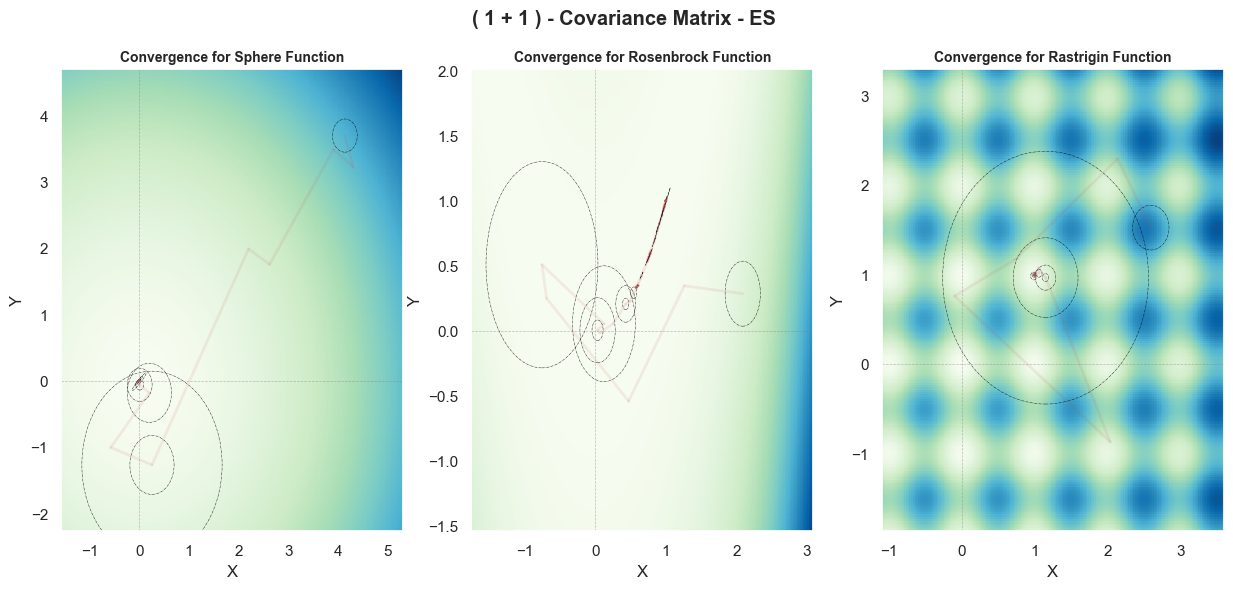

In [6]:
from matplotlib.patches import Ellipse

fig, axs = plt.subplots(1,3,figsize=(15, 6))
fig.suptitle(f"( 1 + 1 ) - Covariance Matrix - ES", fontweight="bold")

for f in [0,1,2]:
    ax= axs[f]
    n=2

    path = os.path.join(os.getcwd(), "one_one_covar")
    filename = f"F_{f}_n_{n}.csv"
    path = os.path.join(path, filename)
    df = pd.read_csv(path)

    # Get Matrixes
    mx_old = [gen.replace("[","").replace("]","").split(" ") for gen in df["covar_mx"]]
    mx_ = []
    for x in mx_old:
        try:
            mx_old = [float(y) for y in x if y != "" and y!='\n'] 
            mx = [[mx_old[0],mx_old[1]],[mx_old[2],mx_old[3]]]
            mx= np.asmatrix(mx)
            mx_.append(mx)
        except:
            print(x)  

    # Get Points
    genes_ = [gen.replace("[","").replace("]","").split(" ") for gen in df["genes"]]
    new_genes_ = []
    for x in genes_:
        gen = [float(y) for y in x if y != ""] 
        new_genes_.append(gen)
    genes_ = new_genes_

    sigmas_ = df["sigma"]


    if True:
    # plot the chart with colors


        df_r[FUNC_NAMES[f]] = new_genes_
        ax.set_xlabel("X")
        ax.set_ylabel("Y")

        #ax.set_ylim(bottom = min(res["rosenbrock"]))
        ax.set_title(f"Convergence for {FUNC_NAMES[f]} Function", fontsize= 10, fontweight = "bold")


        # Print Start and finish
        ax.scatter([genes_[0][0],genes_[-1][0]],[genes_[0][1],genes_[-1][1]],color = "orange")
        alphas = np.linspace(0.1,1,num=len(genes_)+1)
        for i in range(len(genes_)-1):
            ax.plot([genes_[i][0],genes_[i+1][0]],[genes_[i][1],genes_[i+1][1]], 'r', lw=2, alpha=alphas[i])

        # find the limits to view better:
        g_x = [g[0] for g in genes_]
        g_y = [g[1] for g in genes_]
        x_min = min(min(g_x),0)
        y_min = min(min(g_y),0)
        x_max = max(max(g_x),0)
        y_max = max(max(g_y),0)

        ax.set_xlim(left= x_min-1, right = x_max+1)
        ax.set_ylim(bottom= y_min-1, top = y_max+1)

        x = np.linspace(x_min-1,x_max+1,num=201)
        y = np.linspace(y_min-1,y_max+1,num=201)
        X, Y = np.meshgrid(x,y)
        Z = np.zeros((201,201))
        for i in range(201):
            for j in range(201):
                Z[i,j] = calc_fitness((X[i,j],Y[i,j]), f)

        ax.pcolor(X, Y, Z,cmap="GnBu")
        ax.axhline(y=0, color='grey', alpha = 0.5, lw  = 0.5, ls = "--")
        ax.axvline(x=0, color='grey', alpha = 0.5, lw  = 0.5, ls = "--")


    #plot the matrixes
    def get_ellipse(mx=None,center= None, sigma = 1):
        mean_x = center[0]
        mean_y=  center[1]
        lambda_, v = np.linalg.eig(mx)
        lambda_ = np.sqrt(lambda_)
        ell = Ellipse(xy=(mean_x, mean_y),
                    width=lambda_[0]*sigma, height=lambda_[1]*sigma,
                    angle=np.rad2deg(np.arccos(v[0, 0])))
        ell.set_facecolor('none')
        ell.set_edgecolor("black")
        ell.set_linewidth(0.3)
        ell.set_linestyle("-.")
        return ell
    previous_mx = None
    for i in range(len(mx_)):
        if i ==0 or i%10==0:
            ell= get_ellipse(mx=mx_[i], center=genes_[i], sigma= sigmas_[i])
            ax.add_artist(ell)
            previous_mx = mx_[i]

# Compare the results to the CMA Package

(3_w,6)-aCMA-ES (mu_w=2.0,w_1=63%) in dimension 2 (seed=482073, Fri Mar 10 11:42:36 2023)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      6 2.927869190782856e+00 1.0e+00 1.00e+00  1e+00  1e+00 0:00.0
    2     12 3.971754657803708e+00 1.0e+00 1.10e+00  1e+00  1e+00 0:00.0
    3     18 4.603337463166578e+00 1.3e+00 1.01e+00  8e-01  1e+00 0:00.0
   80    480 1.036358948855762e-15 1.1e+00 4.96e-05  5e-08  5e-08 0:00.1
termination on tolfun=1e-11 (Fri Mar 10 11:42:36 2023)
final/bestever f-value = 9.400907e-16 8.895768e-16 after 481/463 evaluations
incumbent solution: [-1.717724551013631e-08, 2.539749773550626e-08]
std deviation: [4.9915527950794146e-08, 4.723917823941508e-08]
(4_w,8)-aCMA-ES (mu_w=2.6,w_1=52%) in dimension 5 (seed=582254, Fri Mar 10 11:42:36 2023)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      8 2.072274427029191e+01 1.0e+00 8.41e-01  8e-01  9e-01 0:00.0
    2     16 1.375001833841497e+01 1.2e+00 8.21e

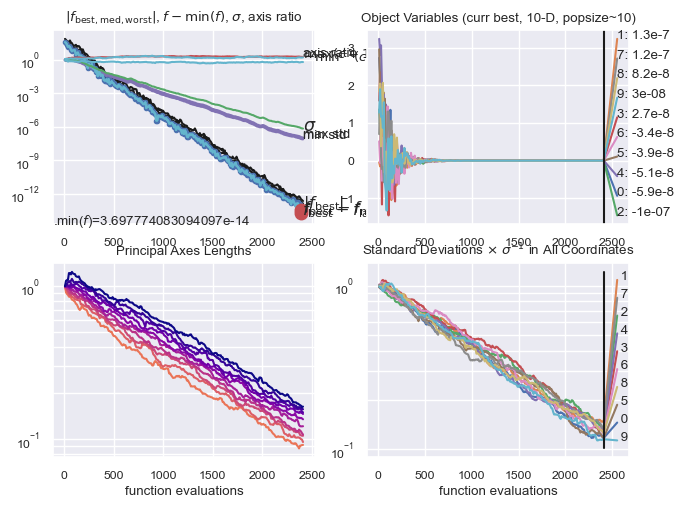

In [10]:
import cma
import numpy as np
sns.set(font_scale=0.8)
# Define the function locally for comparison

def sphere(x):
    return sum([x*x for x in x])
cma_res={}
for N in [2,5,10]:
    n=N
    # This is to get the CMA Data in the logger
    # Starting Parameters
    x0 = N*[2]  # Starting point (not random)
    sigma0 = 1  # Starting Sigma
    xopt, es = cma.fmin2(sphere, x0, sigma0)
    es.plot()
    log = es.logger # here are the results saved 
    cma_res_ = np.transpose(log.x)[4]
    cma_res[N] = cma_res_

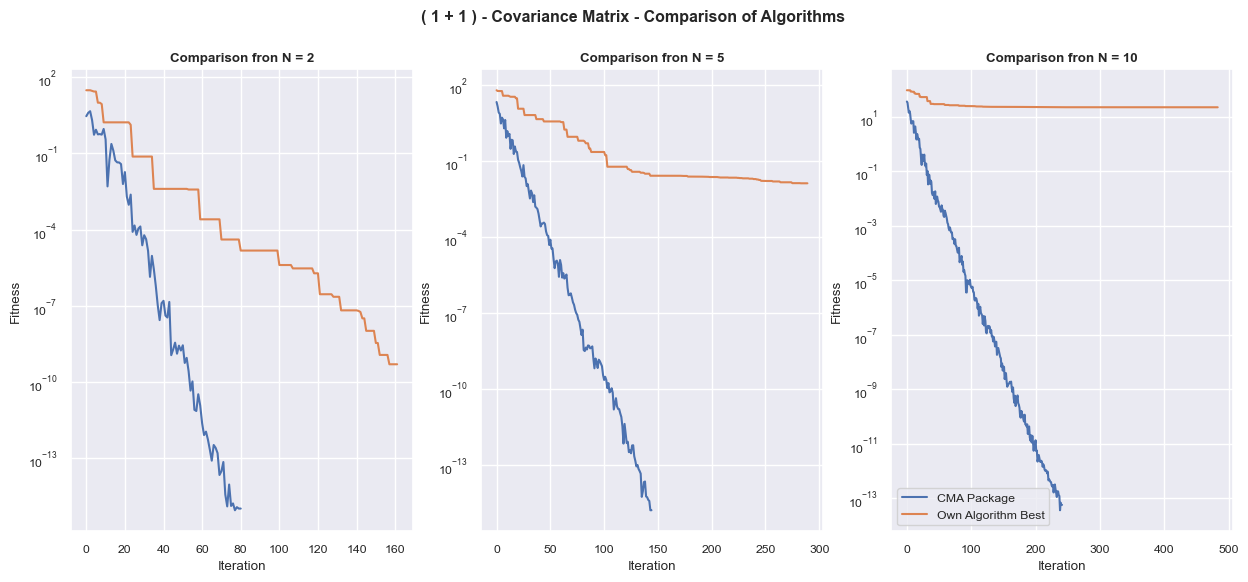

In [18]:

fig, axs = plt.subplots(1, 3, figsize=(15, 6))
fig.suptitle(f"( 1 + 1 ) - Covariance Matrix - Comparison of Algorithms",fontweight="bold")
i = 0
f=0

for N in [2,5,10]:
    cma_res_=cma_res[N] 
    n=N
    #fetch the data of the "restart" using Rechenberg from the file
    #( 1 + 1 ) - ES" + " // " + "Restart + Rechenberg",
    ax = axs[i]
    i += 1
    df_r = pd.DataFrame()
    path = os.path.join(os.getcwd(), "one_one_covar")
    filename = f"F_{f}_n_{n}.csv"
    path = os.path.join(path, filename)
    df = pd.read_csv(path)
    res= df["fitness"][0:len(cma_res_)*2]


    ax.set_yscale("log")
    ax.set_xlabel("Iteration")
    ax.set_ylabel("Fitness")
    ax.set_title(f"Fitness Value, N = {n}", fontweight="bold")


    # Plot a comparison
    ax.plot(cma_res_)
    ax.plot(res)
    ax.set_yscale("log")
    ax.set_title(f"Comparison fron N = {n}", fontweight="bold")

    plt.gca().legend(('CMA Package','Own Algorithm Best',))